We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [5]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['y'] = 0
df.loc[df['species'] == 'Iris-setosa', 'y'] = 2
df.loc[df['species'] == 'Iris-versicolor', 'y'] = 1
df.y.unique()

array([2, 1, 0])

In [12]:
y = df['y']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_pred = knn.predict(X_test)

In [24]:
data=X_test.join(y_test, how='outer')

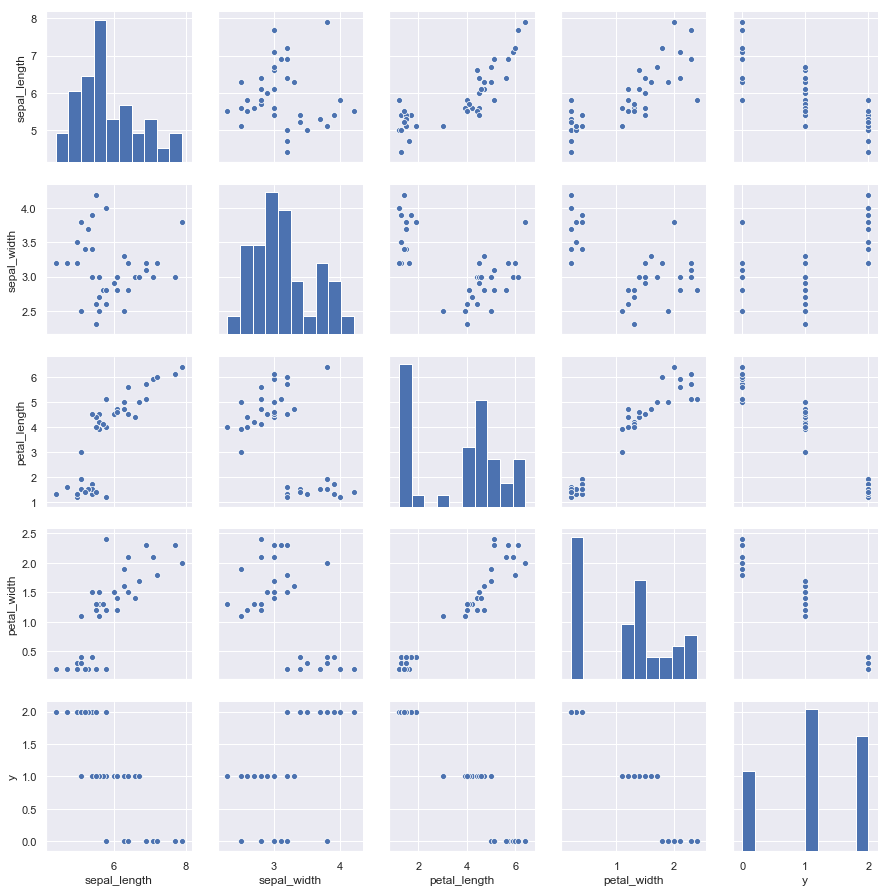

In [25]:
sns.pairplot(data) 

In [26]:
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]])

In [27]:
from sklearn import metrics
print('Test Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

Test Accuracy Score:  1.0
